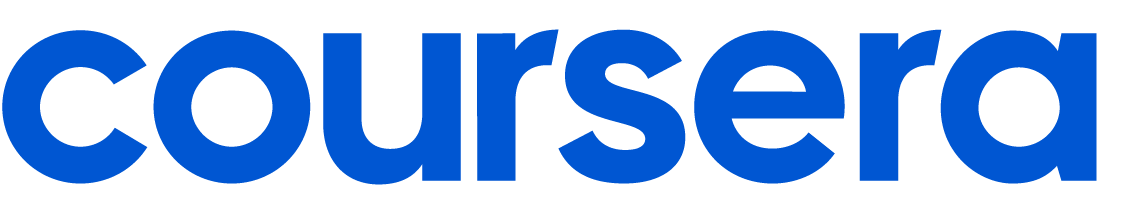

# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant maching learning problems with a unique dataset that will put your modeling skills to the test. Subscription services are leveraged by companies across many industries, from fitness to video streaming to retail. One of the primary objectives of companies with subscription services is to decrease churn and ensure that users are retained as subscribers. In order to do this efficiently and systematically, many companies employ machine learning to predict which users are at the highest risk of churn, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the churn prediction problem on a very unique and interesting group of subscribers on a video streaming service! 

Imagine that you are a new data scientist at this video streaming company and you are tasked with building a model that can predict which existing subscribers will continue their subscriptions for another month. We have provided a dataset that is a sample of subscriptions that were initiated in 2021, all snapshotted at a particular date before the subscription was cancelled. Subscription cancellation can happen for a multitude of reasons, including:
* the customer completes all content they were interested in, and no longer need the subscription
* the customer finds themselves to be too busy and cancels their subscription until a later time
* the customer determines that the streaming service is not the best fit for them, so they cancel and look for something better suited

Regardless the reason, this video streaming company has a vested interest in understanding the likelihood of each individual customer to churn in their subscription so that resources can be allocated appropriately to support customers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past subscriptions of a video streaming platform that contain information about the customer, the customers streaming preferences, and their activity in the subscription thus far. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (243,787 subscriptions to be exact) and importantly, will reveal whether or not the subscription was continued into the next month (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (104,480 subscriptions to be exact), but does not disclose the “ground truth” for each subscription. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the subscriptions in `test.csv` will be continued for another month, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique subscription. For each subscription, a single observation (`CustomerID`) is included during which the subscription was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Churn`.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [1]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's account in months.
1,MonthlyCharges,Feature,float,The amount charged to the user on a monthly basis.
2,TotalCharges,Feature,float,The total charges incurred by the user over the account's lifetime.
3,SubscriptionType,Feature,object,"The type of subscription chosen by the user (Basic, Standard, or Premium)."
4,PaymentMethod,Feature,string,The method of payment used by the user.
5,PaperlessBilling,Feature,string,Indicates whether the user has opted for paperless billing (Yes or No).
6,ContentType,Feature,string,"The type of content preferred by the user (Movies, TV Shows, or Both)."
7,MultiDeviceAccess,Feature,string,Indicates whether the user has access to the service on multiple devices (Yes or No).
8,DeviceRegistered,Feature,string,"The type of device registered by the user (TV, Mobile, Tablet, or Computer)."
9,ViewingHoursPerWeek,Feature,float,The number of hours the user spends watching content per week.


## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 104,480 rows (plus a header row). The first column should be `CustomerID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likellihood that the subscription will churn__.

Your submission will show an error if you have extra columns (beyond `CustomerID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which subscriptions will be retained, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [1]:
# Import required packages
# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
from xgboost import XGBClassifier
# Import any other packages you may want to use
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report, confusion_matrix, silhouette_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.utils.validation import check_is_fitted
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC, SVR
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

In [6]:
import tensorflow as Tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import categorical_crossentropy, BinaryCrossentropy

## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [7]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (243787, 21)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [9]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (104480, 20)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

In [12]:
# your code here (optional)
ratio_of_chrun_1 = len(train_df[train_df['Churn']==1])/len(train_df)
ratio_of_chrun_0 = len(train_df[train_df['Churn']==0])/len(train_df)

print(ratio_of_chrun_1)
ratio_of_chrun_0

0.18123197709475894


0.8187680229052411

In [12]:
train_df.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000
mean,60.083758,12.490695,750.741017,20.502179,92.264061,24.503513,3.002713,4.504186,12.018508,0.181232
std,34.285143,4.327615,523.073273,11.243753,50.505243,14.421174,1.155259,2.872548,7.193034,0.385211
min,1.000000,4.990062,4.991154,1.000065,5.000547,0.000000,1.000007,0.000000,0.000000,0.000000
25%,30.000000,8.738543,329.147027,10.763953,48.382395,12.000000,2.000853,2.000000,6.000000,0.000000
50%,60.000000,12.495555,649.878487,20.523116,92.249992,24.000000,3.002261,4.000000,12.000000,0.000000
75%,90.000000,16.238160,1089.317362,30.219396,135.908048,37.000000,4.002157,7.000000,18.000000,0.000000
max,119.000000,19.989957,2378.723844,39.999723,179.999275,49.000000,4.999989,9.000000,24.000000,1.000000


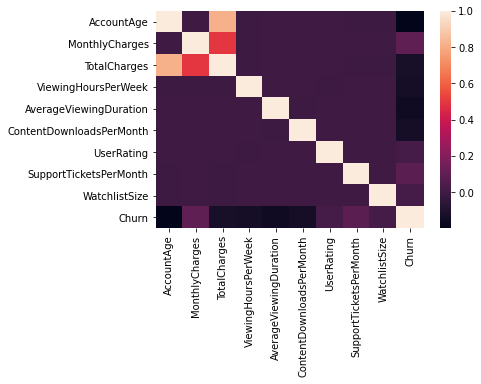

In [19]:
corr = train_df.corr()
sns.heatmap(corr)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non-null  f

In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104480 entries, 0 to 104479
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                104480 non-null  int64  
 1   MonthlyCharges            104480 non-null  float64
 2   TotalCharges              104480 non-null  float64
 3   SubscriptionType          104480 non-null  object 
 4   PaymentMethod             104480 non-null  object 
 5   PaperlessBilling          104480 non-null  object 
 6   ContentType               104480 non-null  object 
 7   MultiDeviceAccess         104480 non-null  object 
 8   DeviceRegistered          104480 non-null  object 
 9   ViewingHoursPerWeek       104480 non-null  float64
 10  AverageViewingDuration    104480 non-null  float64
 11  ContentDownloadsPerMonth  104480 non-null  int64  
 12  GenrePreference           104480 non-null  object 
 13  UserRating                104480 non-null  f

In [9]:
train_df.isnull().sum()

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64

In [16]:
avg_monthly = train_df["TotalCharges"]/train_df["AccountAge"]


In [11]:
train_dummies = pd.get_dummies(train_df.drop(columns=["CustomerID"]))
train_dummies.head()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn,...,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Female,Gender_Male,ParentalControl_No,ParentalControl_Yes,SubtitlesEnabled_No,SubtitlesEnabled_Yes
0,20,11.055215,221.104302,36.758104,63.531377,10,2.176498,4,3,0,...,False,False,False,True,False,True,True,False,True,False
1,57,5.175208,294.986882,32.450568,25.725595,18,3.478632,8,23,0,...,False,False,False,False,False,True,True,False,False,True
2,73,12.106657,883.785952,7.395160,57.364061,23,4.238824,6,1,0,...,False,False,True,False,False,True,False,True,False,True
3,32,7.263743,232.439774,27.960389,131.537507,30,4.276013,2,24,0,...,False,True,False,False,False,True,False,True,False,True
4,57,16.953078,966.325422,20.083397,45.356653,20,3.616170,4,0,0,...,True,False,False,False,True,False,True,False,True,False


In [15]:
train_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   AccountAge                      243787 non-null  int64  
 1   MonthlyCharges                  243787 non-null  float64
 2   TotalCharges                    243787 non-null  float64
 3   ViewingHoursPerWeek             243787 non-null  float64
 4   AverageViewingDuration          243787 non-null  float64
 5   ContentDownloadsPerMonth        243787 non-null  int64  
 6   UserRating                      243787 non-null  float64
 7   SupportTicketsPerMonth          243787 non-null  int64  
 8   WatchlistSize                   243787 non-null  int64  
 9   Churn                           243787 non-null  int64  
 10  SubscriptionType_Basic          243787 non-null  uint8  
 11  SubscriptionType_Premium        243787 non-null  uint8  
 12  SubscriptionType

In [13]:
target = "Churn"
features = train_dummies.drop(columns=[target])
X=features
y=train_dummies[target]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)
print(X_train.shape,"\n",X_test.shape,"\n",y_train.shape,"\n",y_test.shape)

(195029, 38) 
 (48758, 38) 
 (195029,) 
 (48758,)


In [16]:
model_DTC = DecisionTreeClassifier(max_depth=7,random_state=42)
model_DTC.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=7, random_state=42)

In [21]:
prediction = model_DTC.predict(pd.get_dummies(test_df.drop(columns=["CustomerID"])))


AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [24]:
acc_train = accuracy_score(y_train,model_DTC.predict(X_train))#to calculate the Accuracy test
print(acc_train)
acc_test = model_DTC.score(X_test,y_test)
acc_test

0.8211599300616831


0.8214241765453875

In [13]:
tree_depth = model_DTC.get_depth()
tree_depth

8

In [57]:
depth_hyperparams = range(1,50,2)#setting up the hyperparameter
# Create empty lists for training and validation accuracy scores
training_acc = []
validation_acc = []
for d in depth_hyperparams:
    # Create model with `max_depth` of `d`
    test_model = DecisionTreeClassifier(max_depth=d,random_state=42)
    # Fit model to training data
    test_model.fit(X_train, y_train)
    # Calculate training accuracy score and append to `training_acc`
    training_acc.append(test_model.score(X_train,y_train))
    # Calculate validation accuracy score and append to `training_acc`
    validation_acc.append(test_model.score(X_test,y_test))

In [58]:
print(training_acc,"\n",validation_acc)

[0.8185295520153413, 0.8185295520153413, 0.8199242163985869, 0.8211599300616831, 0.8249593650175102, 0.836085915427962, 0.8577801250070503, 0.8889242112711443, 0.9242112711442914, 0.9540273497787508, 0.9751267760179255, 0.987904362940896, 0.9948212829886838, 0.9979233857528881, 0.9992565208251081, 0.9997949022965815, 0.9999589804593163, 0.9999846176722437, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 
 [0.8197218917921162, 0.8197218917921162, 0.8213011198162353, 0.8214241765453875, 0.819004060872062, 0.8119693178555314, 0.7995816071208828, 0.7824562123138767, 0.7640182123959145, 0.7490463103490709, 0.740042659666106, 0.7314286886254563, 0.7279010623897617, 0.7263833627302186, 0.7271217031051315, 0.7254604372615776, 0.7262808154559252, 0.7269371180114033, 0.7263833627302186, 0.7263833627302186, 0.7263833627302186, 0.7263833627302186, 0.7263833627302186, 0.7263833627302186, 0.7263833627302186]


Text(0.5, 1.0, 'Accuracy Score')

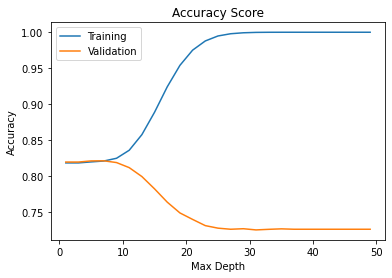

In [60]:
plt.plot(depth_hyperparams,training_acc, label="Training")
plt.plot(depth_hyperparams,validation_acc, label="Validation")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Score")

In [63]:
np.max(validation_acc)

0.8214241765453875

In [23]:
model_RFC = RandomForestClassifier(criterion="entropy",n_estimators=200,random_state=42, verbose=1)
model_RFC.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  2.6min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=1,
                       warm_start=False)

In [25]:
prediction = model_DTC.predict(pd.get_dummies(test_df.drop(columns=["CustomerID"])))
prediction.sum

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
acc_train = model_RFC.score(X_train,y_train)
acc_test = model_RFC.score(X_test,y_test)
print(acc_train,"\n",acc_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   14.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


1.0 
 0.8227162722014849


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    3.7s finished


In [ ]:
model_RFC.predict(test_df)

In [22]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           n_jobs=-1,  # Use all available CPUs
                           scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Accuracy Score: {best_score}')


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Accuracy Score: 0.8228007117755602


In [34]:
# Identify numerical and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Preprocessing for numerical data: impute missing values and scale
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data: impute missing values and one-hot encode
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

# Define the models to test
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

# Dictionary to store the cross-validation scores
cv_results = {}

# Perform cross-validation and evaluate each model
for model_name, model in models.items():
    # Create a pipeline that includes preprocessing and the model
    clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    
    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    
    # Store the results
    cv_results[model_name] = cv_scores

print(cv_results)

# Custom cross-validation function to save the best model
best_score = 0
best_params = None
best_model = None

# Perform 5-fold cross-validation
for train_index, test_index in StratifiedKFold(n_splits=5, shuffle=True, random_state=42).split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    clf.fit(X_train_fold, y_train_fold)
    score = clf.score(X_test_fold, y_test_fold)
    
    if score > best_score:
        best_score = score
        best_params = clf.named_steps['classifier'].get_params()
        best_model = clf

print(f'Best cross-validation score: {best_score}')
print(f'Best parameters: {best_params}')

{'Logistic Regression': array([0.82120699, 0.82500128, 0.82551402, 0.82200174, 0.8226894 ])}
Best cross-validation score: 0.8248987335281751
Best parameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [26]:
log_reg = LogisticRegression(max_iter=1000)

# Create a pipeline that includes preprocessing and the model
clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', log_reg)])

# Set up GridS# Custom cross-validation function to save the best model
best_score = 0
best_params = None
best_model = None

# Perform 5-fold cross-validation
for train_index, test_index in StratifiedKFold(n_splits=5, shuffle=True, random_state=42).split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    clf.fit(X_train_fold, y_train_fold)
    score = clf.score(X_test_fold, y_test_fold)
    
    if score > best_score:
        best_score = score
        best_params = clf.named_steps['classifier'].get_params()
        best_model = clf

print(f'Best cross-validation score: {best_score}')
print(f'Best parameters: {best_params}')earchCV to find the best parameters
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],  # Example parameter grid
    'classifier__solver': ['liblinear', 'lbfgs']
}
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best score and the best parameters
best_score = grid_search.best_score_
best_params = grid_search.best_params_

print(f'Best cross-validation score: {best_score}')
print(f'Best parameters: {best_params}')

Best cross-validation score: 0.8233134527477762
Best parameters: {'classifier__C': 0.01, 'classifier__solver': 'lbfgs'}


In [32]:

# Custom cross-validation function to save the best model
best_score = 0
best_params = None
best_model = None

# Perform 5-fold cross-validation
for train_index, test_index in StratifiedKFold(n_splits=5, shuffle=True, random_state=42).split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    clf.fit(X_train_fold, y_train_fold)
    score = clf.score(X_test_fold, y_test_fold)
    
    if score > best_score:
        best_score = score
        best_params = clf.named_steps['classifier'].get_params()
        best_model = clf

print(f'Best cross-validation score: {best_score}')
print(f'Best parameters: {best_params}')

Best cross-validation score: 0.8248987335281751
Best parameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [ ]:
# Define the parameter grid for Random Forest
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__max_depth': [10, 20, 30, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Create a pipeline that includes preprocessing and the model
clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier(random_state=42))])

# Instantiate the grid search model
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Output the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)

In [ ]:
# Identify numerical and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Preprocessing for numerical data: impute missing values and scale
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data: impute missing values and one-hot encode
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for Logistic Regression
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],  # Regularization strength
    'classifier__penalty': ['l1', 'l2', 'none'],  # Norm used in the penalization (elasticnet is only supported by saga solver)
    'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],  # Algorithm to use in the optimization problem
    'classifier__max_iter': [100, 200, 300]  # Maximum number of iterations
}

# Create a pipeline that includes preprocessing and the model
clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression(random_state=42, solver='saga', max_iter=300))])

# Instantiate the grid search model
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Output the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)

# Evaluate the best model on the validation set
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)
print(classification_report(y_val, y_val_pred))

In [ ]:
# Identify numerical and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Preprocessing for numerical data: impute missing values and scale
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data: impute missing values and one-hot encode
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])
# Define the parameter grid for Logistic Regression
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],  # Regularization strength
    'classifier__penalty': ['l1', 'l2'],  # Norm used in the penalization
    'classifier__solver': ['liblinear', 'saga'],  # Solvers that support l1 penalty
    'classifier__max_iter': [100, 200, 300]  # Maximum number of iterations
}

# Create a pipeline that includes preprocessing, SMOTE, and the Logistic Regression model
clf = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(random_state=42))
])

# Instantiate the grid search model
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Output the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)

# Evaluate the best model on the validation set
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_test)
print(classification_report(y_test, y_val_pred))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [ ]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Preprocessing for numerical data: impute missing values and scale
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data: impute missing values and one-hot encode
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline that includes preprocessing and the SVM model
clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', SVC(random_state=42))])

# Train the SVM model
clf.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = clf.predict(X_val)

# Evaluate the model
print(classification_report(y_val, y_val_pred))

In [ ]:
model_SVM = SVC().fit(X_train,y_train)
prediction = model_SVM.predict(pd.get_dummies(test_df.drop(columns=["CustomerID"])))

In [26]:
acc_train = model_SVM.score(X_train,y_train)
acc_test = model_SVM.score(X_test,y_test)
print(acc_train,"\n",acc_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   14.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


1.0 
 0.8227162722014849


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    3.7s finished


In [17]:
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=2, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [21]:
# make predictions
preds = bst.predict(X_test)
preds

array([0, 0, 0, ..., 0, 0, 0])

### Example prediction submission:

The code below is a very naive prediction method that simply predicts churn using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

In [26]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Use our dummy classifier to make predictions on test_df using `predict_proba` method:
predicted_probability_RFC = grid_search.predict_proba(pd.get_dummies(test_df.drop(['CustomerID'], axis=1)))[:, 1]

In [28]:
predicted_probability_RFC

array([0.14787836, 0.05434244, 0.4043346 , ..., 0.08640301, 0.31461336,
       0.03795861])

In [30]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS
for i in range(len(predicted_probability_RFC)):
    if predicted_probability_RFC[i]>=0.5:
        predicted_probability_RFC[i] = 1.0
    else:
        predicted_probability_RFC[i] = 0.0

In [32]:
predicted_probability_RFC

array([0., 0., 0., ..., 0., 0., 0.])

In [34]:
# Combine predictions with label column into a dataframe
prediction_df_RFC = pd.DataFrame({'CustomerID': test_df[['CustomerID']].values[:, 0],
                             'predicted_probability': predicted_probability_RFC})

In [36]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(prediction_df_RFC.shape)
prediction_df_RFC

(104480, 2)


,CustomerID,predicted_probability
0,O1W6BHP6RM,0.0
1,LFR4X92X8H,0.0
2,QM5GBIYODA,0.0
3,D9RXTK2K9F,0.0
4,ENTCCHR1LR,0.0
...,...,...
104475,UTKREC613O,0.0
104476,MDB4E477PS,0.0
104477,IPDIA02ZE1,0.0
104478,ITLFTPRJGV,0.0


**PLEASE CHANGE CODE ABOVE TO IMPLEMENT YOUR OWN PREDICTIONS**

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [38]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df_RFC.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [40]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'CustomerID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [42]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 104480, 'The dataframe prediction_df should have 104480 rows.'

In [44]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [46]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!